Assume, we want to use a pre-trained model's all the layers except the output layers for binary image classification problem.

In [2]:
import tensorflow as tf

pre_trained_model = tf.keras.models.load_model("my_trained_model")
new_model = tf.keras.Sequential(pre_trained_model.layers[:-1])
new_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

Now, new_model and pre_trained_model are sharing the same layers. So, training new_model on new data will affect the pre_trained_model. To avoid this problem, we can clone the model. Cloning the model means copying the weights.

In [3]:
pre_trained_model_clone = tf.keras.models.clone_model(pre_trained_model)
pre_trained_model_clone.set_weights(pre_trained_model.get_weights())

Now, new_model is ready for training. But, since new output layer was initilized randomly it will make large errors (at least first few epochs). One approch is for that to freez the reused layers for the first few epochs, to do that set trainable attribute False.

In [4]:
for layer in new_model.layers[:-1]:
    layer.trainable = False

In [5]:
# must compile the model after freez or unfreez layers
new_model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001), # better to use low learning_rate
    metrics = ["accuracy"]
)

In [8]:
from sklearn.model_selection import train_test_split

mnist = tf.keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train, y_train = X_train_full[:500], y_train_full[:500]

X_train, X_test = X_train/255., X_test/255.

# Convert labels to binary (1 if the digit is 5, 0 otherwise)
y_train_binary = (y_train == 5).astype(int)
y_test_binary = (y_test == 5).astype(int)

X_train, X_val, y_train_binary, y_val_binary = train_test_split(X_train, y_train_binary, test_size=0.1, random_state=42)

In [10]:
history = new_model.fit(X_train, y_train_binary, epochs=4, validation_data=(X_val, y_val_binary))

Epoch 1/4
15/15 [==============================] - 1s 24ms/step - loss: 0.8314 - accuracy: 0.4378 - val_loss: 0.9733 - val_accuracy: 0.4800
Epoch 2/4
15/15 [==============================] - 0s 5ms/step - loss: 0.7657 - accuracy: 0.5244 - val_loss: 0.9115 - val_accuracy: 0.5200
Epoch 3/4
15/15 [==============================] - 0s 5ms/step - loss: 0.7128 - accuracy: 0.5822 - val_loss: 0.8530 - val_accuracy: 0.5400
Epoch 4/4
15/15 [==============================] - 0s 6ms/step - loss: 0.6634 - accuracy: 0.6378 - val_loss: 0.8019 - val_accuracy: 0.5600


In [11]:
for layer in new_model.layers[:-1]:
    layer.trainable = True

In [12]:
new_model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001), # better to use low learning_rate
    metrics = ["accuracy"]
)

In [13]:
history = new_model.fit(X_train, y_train_binary, epochs=16, validation_data=(X_val, y_val_binary))

Epoch 1/16
15/15 [==============================] - 1s 22ms/step - loss: 0.6173 - accuracy: 0.6711 - val_loss: 0.7494 - val_accuracy: 0.6000
Epoch 2/16
15/15 [==============================] - 0s 6ms/step - loss: 0.5691 - accuracy: 0.7244 - val_loss: 0.7039 - val_accuracy: 0.6000
Epoch 3/16
15/15 [==============================] - 0s 6ms/step - loss: 0.5295 - accuracy: 0.7556 - val_loss: 0.6684 - val_accuracy: 0.6400
Epoch 4/16
15/15 [==============================] - 0s 6ms/step - loss: 0.4967 - accuracy: 0.7978 - val_loss: 0.6348 - val_accuracy: 0.6800
Epoch 5/16
15/15 [==============================] - 0s 6ms/step - loss: 0.4809 - accuracy: 0.8089 - val_loss: 0.6071 - val_accuracy: 0.7200
Epoch 6/16
15/15 [==============================] - 0s 7ms/step - loss: 0.4488 - accuracy: 0.8267 - val_loss: 0.5804 - val_accuracy: 0.7400
Epoch 7/16
15/15 [==============================] - 0s 7ms/step - loss: 0.4350 - accuracy: 0.8533 - val_loss: 0.5542 - val_accuracy: 0.7600
Epoch 8/16
15/15 [=

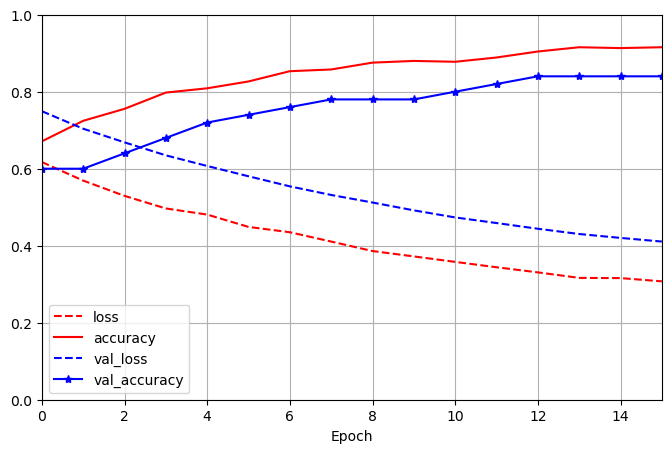

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize = (8,5), xlim=[0,15], ylim=[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r-", "b--", "b-*"]
)
plt.show()

In [17]:
new_model.evaluate(X_test, y_test_binary)

313/313 [==============================] - 1s 3ms/step - loss: 0.3411 - accuracy: 0.8874


[0.3410522937774658, 0.8873999714851379]